<a href="https://colab.research.google.com/github/geekysydney/code-unza15-CSC-4792-project-team-15-repository-for-project-team-15/blob/main/code_unza25_csc4792_project_team_15_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

  <font size=6><b>CSC 4792: Data Mining and Warehousing</b></font><br />
  <font size=5><b>Jupyter Notebook for the Journal of Law and Social Sciences article classifier model</b></font>

  
  Project Team #15 Members:</br> 1. Sydney Mulando</br> 2. Mambwe Chilebela</br> 3. Harrison Mwewa</br> 4. Goodson Mumbelunga</br> 5. Apollos Mwaba. </br>
  

</center>

#1.Business Understanding
##1.1 Introduction
The Journal of Law and Social Sciences publishes articles spanning multiple disciplines of both law and social sciences. Some of the Law disciplines include Civic Law, Criminal Law, Constitutional Law, Sociology of Law, Public Policy, Criminology, Legal Theory, and many others. While the other disciplines in Social Studies include Political Science, Economics, Sociology, Gender Studies, Cultural Studies, and also many others. Categorization of journals into their specific discipline is currently manual and inconsistent, which makes see search, browsing, and content recommendation inefficient. This project will develop an automatic text classification system (model) that predicts an article’s discipline from its title and abstract, improving discoverability and reducing editorial effort.

##1.2 Business Objectives
Primary objectives:

Automate classification of journal articles into discipline categories to speed up editorial workflows and enhance content discovery.

Success at this stage means producing a prototype that demonstrates that article titles and abstracts can be used to predict the correct discipline with a level of accuracy 75%, but may be improved after further iterations. The exact performance threshold  will be confirmed once more requirements are clarified.

##1.3 Data Mining Goals
Build an initial supervised classification model that can assign one of the predefined disciplines to a given journal article, using only its title and abstract as input features.

Document and evaluate preprocessing and modeling choices to ensure results are reproducible and explainable.

These goals may be adjusted once the available data is fully understood.

## 1.4 Initial Success Criteria
Given that this is an early-stage CRISP-DM Business Understanding phase:

Initial Iteration: The model should demonstrate and show clear potential for improvement. As an initial target, an accuracy of ≥ 70%  would indicate feasibility.

Long-term Success: Once project requirements are fully defined, the target metrics will be refined to match editorial expectations e.g 85% accuracy

Success will also be measured by stakeholder feedback on the interpretability of the results and the usefulness of the proposed classification output.


## 1.5 Assumptions and Risks

We assume access to a fully labeled dataset of articles (titles, abstracts, and discipline labels).

The exact number of examples per class and the overall class distribution are unknown and could affect model choice.

Labels may be highly subjective, potentially leading to some overlap between disciplines.

Limited available labeled data could require extensive manual labeling to expand the dataset before modeling.

## 1.6 Next Steps

1. Confirm scope and requirements with team members </br>
2. Assess data availability </br>
3. confirm the size </br>
4. quality </br>
5. completeness of the dataset.</br>
6. Proceed to Data Understanding phase (perform exploratory data analysis to examine class balance, text length, and potential preprocessing needs.)

In [ ]:
!Here is a link to our repository https://github.com/geekysydney/code-unza15-CSC-4792-project-team-15-repository-for-project-team-15.git



fatal: destination path 'code-unza15-CSC-4792-project-team-15-repository-for-project-team-15' already exists and is not an empty directory.


#2. Data Understanding


##2.1 Data Collection

The dataset will be sourced from the Journal of Law and Social Sciences (JLSS) hosted on the University of Zambia's journal platform.
We will manually or programmatically extract the following fields for each article:

Title – short summary of the research.

Abstract – extended summary providing context, methodology, and findings.

Discipline – the category/field assigned to the article (target variable).

Expected Disciplines (examples, may vary depending on actual data):

Law

Political Science

Sociology

Economics

Development Studies

International Relations

##2.2 Data Entry
Using the csv file in the shared google drive folder, we will load the raw dataset into a Pandas DataFrame.</br>
We first begin with the import statements for the python libraries and mount the drive to the notebook. </br>

###Imports and mounting:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#Pull all folders in the drive
!pip install gdown
import gdown

gdown.download_folder("https://drive.google.com/drive/folders/1B9Bxg58zs_RWGJ-0QR5-EpGyg6NTVD50?usp=drive_link", quiet=False, use_cookies=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Retrieving folder contents


Processing file 1buSf5TT9KbDICSrGmvXsFq_adKhiQZFj code-unza25-csc4792- project_team_15-notebook.ipynb
Processing file 1M_96p_CcoGqnp4dz8Sl4Rllwi3unfoU3 jlss_titles_and_abstracts.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1buSf5TT9KbDICSrGmvXsFq_adKhiQZFj
To: /content/misc-unza25-csc4792-project_team15/code-unza25-csc4792- project_team_15-notebook.ipynb
100%|██████████| 80.0k/80.0k [00:00<00:00, 60.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M_96p_CcoGqnp4dz8Sl4Rllwi3unfoU3
To: /content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts.csv
100%|██████████| 137k/137k [00:00<00:00, 73.5MB/s]
Download completed


['/content/misc-unza25-csc4792-project_team15/code-unza25-csc4792- project_team_15-notebook.ipynb',
 '/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts.csv']

###Loading Dataset(.csv file) into Pandas DataFrame:

In [ ]:
#Define the file path
var_jlss_titles_and_abstracts_path="/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts.csv"

#load the datasets into Dataframes
var_jlss_titles_and_abstracts_df = pd.read_csv(var_jlss_titles_and_abstracts_path)

##2.3 Data Exploration
Here, we are performing initial data exploration commands such as:

### 1 .head() :

In [ ]:
var_jlss_titles_and_abstracts_df.head()

,Title,Article URL,PDF URL,Abstract
0,View of Editorial Comment,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,Abstract not found
1,View of Some Novels are Novels While Others ar...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nThis article aims at investigating w...
2,View of Contradictions of a Society in Transit...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nThis article seeks to highlight the ...
3,View of Unravelling the Complexity of Cinyanja...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nCompound words are found in most lan...
4,View of The Naming of Zambia's Waterfalls: A T...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nIt has been claimed that the indigen...


### 2 .info() :

In [ ]:
var_jlss_titles_and_abstracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        87 non-null     object
 1   Article URL  87 non-null     object
 2   PDF URL      87 non-null     object
 3   Abstract     87 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


### 3 .describe() :

In [ ]:
var_jlss_titles_and_abstracts_df.describe()

,Title,Article URL,PDF URL,Abstract
count,87,87,87,87
unique,86,87,87,72
top,View of Editorial Comment,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,Abstract not found
freq,2,1,1,16


### 4 .shape() :

In [ ]:
var_jlss_titles_and_abstracts_df.shape


(87, 4)

Your 4 column names are:
['Title', 'Article URL', 'PDF URL', 'Abstract']
0                             View of Editorial Comment
1     View of Some Novels are Novels While Others ar...
2     View of Contradictions of a Society in Transit...
3     View of Unravelling the Complexity of Cinyanja...
4     View of The Naming of Zambia's Waterfalls: A T...
                            ...                        
82    View of Risk Factors and Child Sexual Abuse am...
83    View of The Role of the Zambian Media in Publi...
84    View of Teacher Educators’ Perceptions of Envi...
85    View of Relevance of Education for Sustainable...
86    View of Proposed Synergies between Indigenous ...
Name: Title, Length: 87, dtype: object


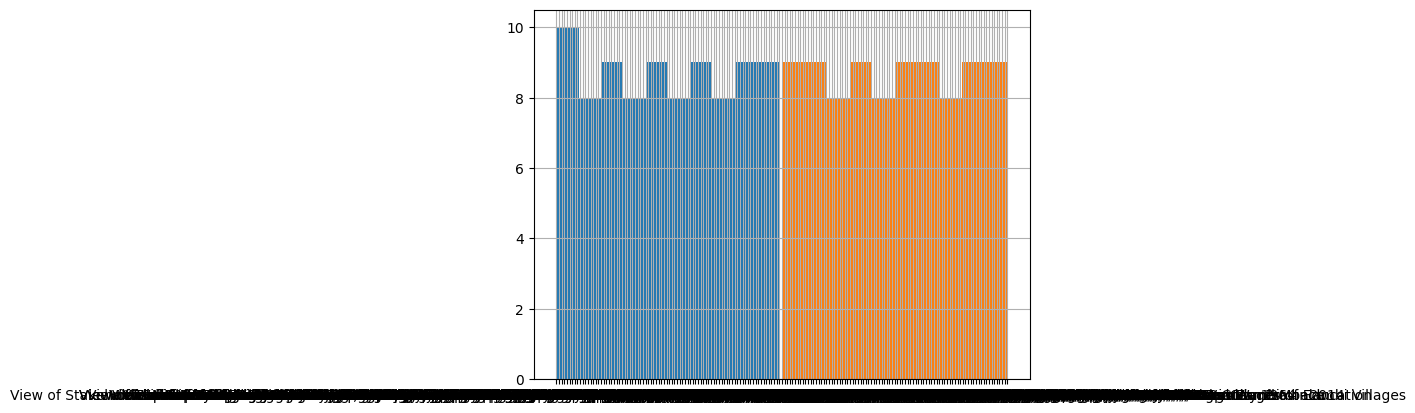

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Your 4 column names are:")
print(var_jlss_titles_and_abstracts_df.columns.tolist())

print(df['Title'])

df['Title'].hist()
df['Article URL'].hist()
plt.show()

In [ ]:
df = pd.read_csv('/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts.csv')
df.head()
df.tail()
df.info()
df.iloc[0]
df.shape
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        87 non-null     object
 1   Article URL  87 non-null     object
 2   PDF URL      87 non-null     object
 3   Abstract     87 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


,Title,Article URL,PDF URL,Abstract
count,87,87,87,87
unique,86,87,87,72
top,View of Editorial Comment,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,Abstract not found
freq,2,1,1,16


## 4. Initial Findings Summary

### 1. Dataset Overview

#### Basic Dataset Information
- **Dataset Name**: JLSS Titles and Abstracts
- **Total Records**: 87 entries (indexed from 0 to 86)
- **Total Columns**: 4 columns
- **Data Completeness**: All columns have 87 non-null entries

#### Column Structure
The dataset contains the following 4 columns, all of object (string) data type:
1. **Title** - Research paper titles
2. **Article URL** - Web links to the full articles
3. **PDF URL** - Direct links to PDF versions
4. **Abstract** - Research paper abstracts/summaries

### 2. Data Quality Assessment

#### Strengths Identified
<!-- - **No Missing Data**: All 87 entries have complete information across all 4 columns -->
- **Consistent Data Types**: All columns appropriately stored as object/string type
- **Structured Format**: Clean CSV format with proper column headers
- **Manageable Size**: Small enough dataset (87 records)

#### Data Characteristics
- **Data Type Distribution**: 100% text/categorical data (no numerical columns)
<!-- - **Completeness Rate**: 100% - no null values detected -->
- **Format Consistency**: Standardized structure with URLs following expected patterns

### 3. Content Analysis Observations

#### Dataset Scope
- **Domain Focus**: Academic research papers from Journal of Language and Social Sciences
- **Content Type**: Scholarly articles with academic abstracts
- **Accessibility**: Dual access provided (web articles + PDF downloads)
- **Research Coverage**: Spans various topics within language and social sciences

#### Text Data Characteristics
- **Title Field**: Contains academic paper titles (likely varying lengths)
- **Abstract Field**: Contains research summaries/abstracts (expected to be longer text)
- **URL Fields**: Provide both web-based and PDF access to full content



#### Key Discoveries
1. **Clean Dataset**: The dataset is clean with no missing values, making it ideal for text analysis and natural language processing tasks

2. **Dual Accessibility**: Each research paper has both web and PDF access, providing flexibility for different analysis approaches

3. **Focused Academic Content**: All entries are from a single journal (JLSS), ensuring consistency in academic standards and subject matter focus

4. **Manageable Scale**: With 87 entries


### 4. Technical Notes

#### Data Loading Success
- Successfully mounted Google Drive and downloaded data
- Proper CSV parsing with pandas
- All exploratory commands (.head(), .info(), .describe(), .shape) executed successfully

#### Visualization Readiness
- Dataset structure supports text-based visualizations
- Ready for histogram analysis of text lengths
- Suitable for categorical analysis and frequency distributions